In [4]:
# for manipulation
import pandas as pd
import numpy as np

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#for interactivity
from ipywidgets import interact 

In [5]:
data = pd.read_csv('Crop_recommendation.csv')

In [6]:
print(data)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


In [7]:
# N refers to Nitrogen, P refers to Phosphorous, K refers to Potassium
print(data.shape)

(2200, 8)


# checking miss data

In [8]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
# Check crops present in dataset
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

# check summary statistics for all crop using ipywidgets
# provide dropdown 

In [10]:
@interact
def summary(crops=list(data['label'].value_counts().index)):
    x = data[data['label']==crops]
    print('Requirements of Every Crop')
    print('---------------------------------')
    print('Minimum Nitrogen required', x['N'].min())
    print('Average Nitrogen required', x['N'].mean())
    print('Maximum Nitrogen required', x['N'].max())
    print('---------------------------------')
    print('Minimum Phosphorous required', x['P'].min())
    print('Average Phosphorous required', x['P'].mean())
    print('Maximum Phosphorous required', x['P'].max())
    print('---------------------------------')
    print('Minimum Potassium required', x['K'].min())
    print('Average Potassium required', x['K'].mean())
    print('Maximum Potassium required', x['K'].max())
    print('---------------------------------')
    print('Minimum Temperature required', x['temperature'].min())
    print('Average Temperature required', x['temperature'].mean())
    print('Maximum Temperature required', x['temperature'].max())
    print('---------------------------------')
    print('Minimum Humidity required', x['humidity'].min())
    print('Average Humidity required', x['humidity'].mean())
    print('Maximum Humidity required', x['humidity'].max())
    print('---------------------------------')
    print('Minimum PH required', x['ph'].min())
    print('Average PH required', x['ph'].mean())
    print('Maximum PH required', x['ph'].max())
    print('---------------------------------')
    print('Minimum Rainfall required', x['rainfall'].min())
    print('Average Rainfall required', x['rainfall'].mean())
    print('Maximum Rainfall required', x['rainfall'].max())

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

# clustering analysis (Putting datapoint to same group)

In [12]:
from sklearn.cluster import KMeans

#removing the label coumn as we are using unsupervised learning

cluster_data = data.drop(['label'], axis=1)

#checking shape

cluster_data.shape

(2200, 7)

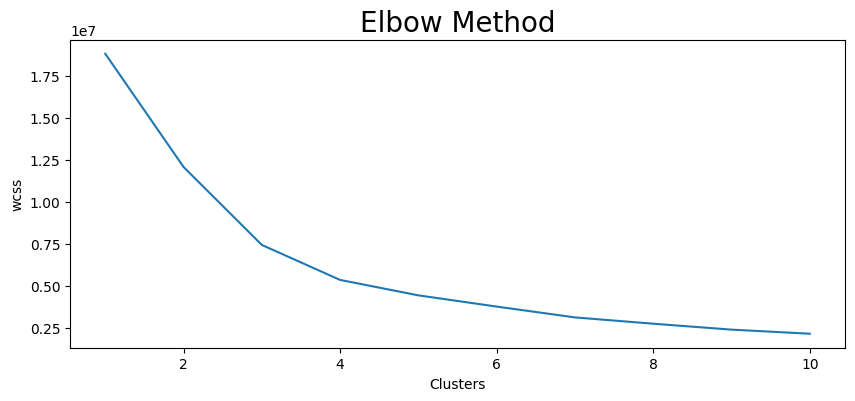

In [16]:
# Determining optimum number of cluster

plt.rcParams['figure.figsize'] = (10,4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0 )
    km.fit(cluster_data)
    wcss.append(km.inertia_)
    
#plotting result
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method', fontsize=20)
plt.xlabel('Clusters')
plt.ylabel('wcss')
plt.show()

In [20]:
# we can see two elbow on 3 and 4
# we will take highest one 4

# Implementing K Means algorithm to perform Clustering analysis

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(cluster_data)

# finding result
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis=1)
z = z.rename(columns = {0: 'cluster'})

print('crops in first cluster', z[z['cluster']==0]['label'].unique())
print('-------------------')
print('crops in second cluster', z[z['cluster']==1]['label'].unique())
print('-------------------')
print('crops in third cluster', z[z['cluster']==2]['label'].unique())
print('-------------------')
print('crops in fourth cluster', z[z['cluster']==3]['label'].unique())

crops in first cluster ['grapes' 'apple']
-------------------
crops in second cluster ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
-------------------
crops in third cluster ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
-------------------
crops in fourth cluster ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [24]:
# splitting data

y = data['label']
x = data.drop(['label'], axis=1)

In [25]:
# creating training and testing set

from sklearn.model_selection import train_test_split

x_train ,x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

print('Shape of x train', x_train.shape)
print('Shape of x test', x_test.shape)
print('Shape of y train', y_train.shape)
print('Shape of y test', y_test.shape)

Shape of x train (1760, 7)
Shape of x test (440, 7)
Shape of y train (1760,)
Shape of y test (440,)


In [42]:
# we are going to use logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(solver='lbfgs', max_iter=400)
model.fit(x_train.values, y_train.values)
crop_predict = model.predict(x_test.values)

/home/shubham/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
cr = classification_report(y_test, crop_predict)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.83      0.86      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.88      0.94      0.91        16
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.95      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.88      0.88        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [35]:
# checking from our own data
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [41]:
prediction = model.predict(np.array([[100, 30, 27, 26, 67, 6.3, 177]]))
print('Suggested crop according to given climatic condition:', prediction)

Suggested crop according to given climatic condition: ['coffee']
